In [10]:
import sklearn
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

In [2]:
Project_root_Dir = "/content/sample_data/"
Chapter_id = "decision_Trees"
Images_path = os.path.join(Project_root_Dir, "images" , Chapter_id)
os.makedirs(Images_path, exist_ok = True)

def save_fig(fig_id, tight_layout = True, fig_extension = 'png', resolution = 300):
  path = os.path.join(Images_path, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)

  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format = fig_extension, dpi = resolution)


In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state = 42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

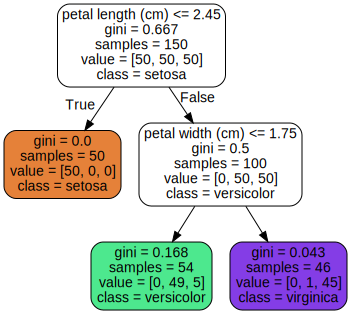

In [4]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
                out_file = os.path.join(Images_path, 'iris_tree.dot'),
                feature_names = iris.feature_names[2:],
                class_names = iris.target_names,
                rounded=True,
                filled = True)

Source.from_file(os.path.join(Images_path,'iris_tree.dot'))

In [5]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf,X, y, axes=[0, 7.5, 0, 3], iris=True, 
                           legend =False, plot_training=True):
  x1s = np.linspace(axes[0], axes[1], 100)
  x2s = np.linspace(axes[2], axes[3], 100)
  x1, x2 = np.meshgrid(x1s, x2s)
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)
  custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
  if not iris:
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
  if plot_training:
    plt.plot(X[:, 0][y==0],X[:, 1][y==0], "yo", label="Iris setosa")
    plt.plot(X[:, 0][y==1],X[:, 1][y==1], "bs", label="Iris versicolor")
    plt.plot(X[:, 0][y==2],X[:, 1][y==2], "g^", label="Iris virginica")
    plt.axis(axes)
  if iris:
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
  else:
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  if legend:
    plt.legend(loc="lower right", fontsize=14)

Saving figure decision_tree_decision_bounbaries_plot


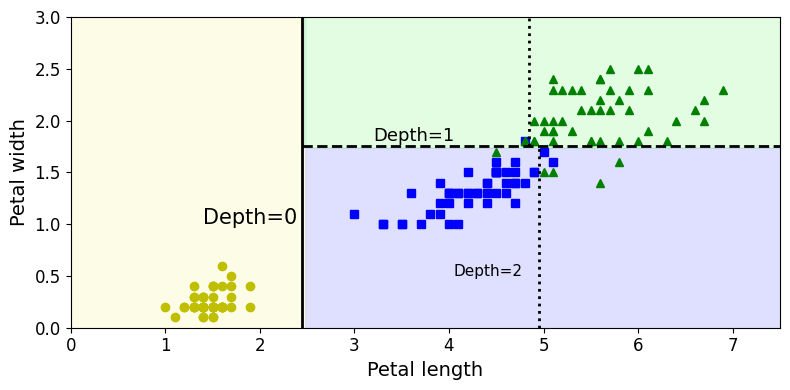

In [11]:
plt.figure(figsize = (8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], 'k-', linewidth = 2)
plt.plot([2.45, 7.5], [1.75, 1.75], 'k--', linewidth = 2)
plt.plot([4.95, 4.95], [0, 1.75], 'k:', linewidth = 2)
plt.plot([4.85, 4.85], [1.75, 3], 'k:', linewidth = 2)

plt.text(1.40, 1.0, "Depth=0", fontsize = 15)
plt.text(3.2, 1.80, "Depth=1", fontsize = 13)
plt.text(4.05, 0.5, "Depth=2", fontsize = 11)

save_fig("decision_tree_decision_bounbaries_plot")
plt.show()

In [13]:
print(tree_clf.predict_proba([[5, 1.5]]))
print(tree_clf.predict([[5, 1.5]]))

[[0.         0.90740741 0.09259259]]
[1]


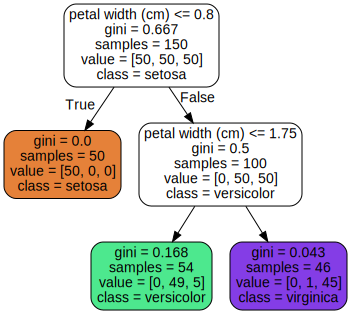

In [15]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth = 2, random_state = 40) #random state 다르게
tree_clf_tweaked.fit(X,y)
export_graphviz(tree_clf_tweaked,
                out_file = os.path.join(Images_path, 'iris_tree.dot'),
                feature_names = iris.feature_names[2:],
                class_names = iris.target_names,
                rounded=True,
                filled = True)

Source.from_file(os.path.join(Images_path,'iris_tree.dot'))

Saving figure decision_tree_instability_plot


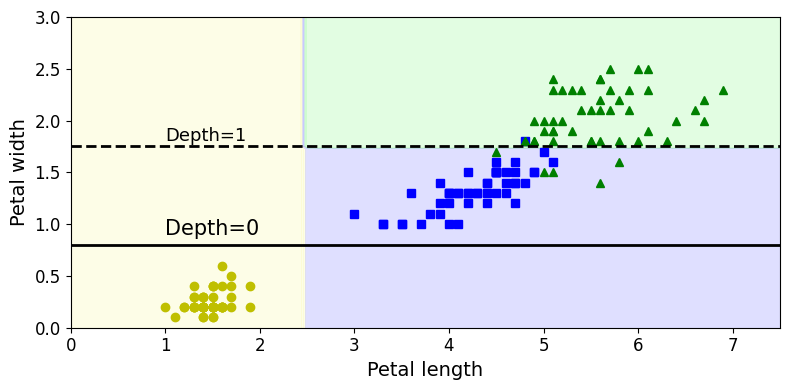

In [16]:
plt.figure(figsize = (8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([0, 7.5], [0.8 , 0.8], 'k-', linewidth = 2)
plt.plot([0, 7.5], [1.75, 1.75], 'k--', linewidth = 2)
plt.text(1.0, 0.9, "Depth=0", fontsize = 15)
plt.text(1.0, 1.80, "Depth=1", fontsize = 13)

save_fig("decision_tree_instability_plot")
plt.show()

Saving figure min_samples_leaf_plot


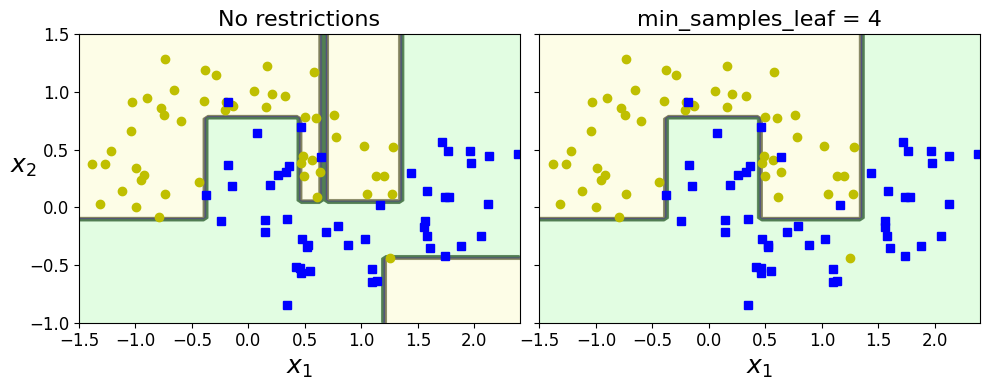

In [18]:
from sklearn.datasets import make_moons
Xm, ym =  make_moons(n_samples = 100, noise = 0.25, random_state = 53)

deep_tree_clf1 = DecisionTreeClassifier(random_state = 42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf= 4, random_state = 42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols = 2, figsize = (10, 4), sharey = True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes = [-1.5, 2.4, -1, 1.5], iris = False)
plt.title("No restrictions", fontsize = 16)

plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes = [-1.5, 2.4, -1, 1.5], iris = False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize = 16)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

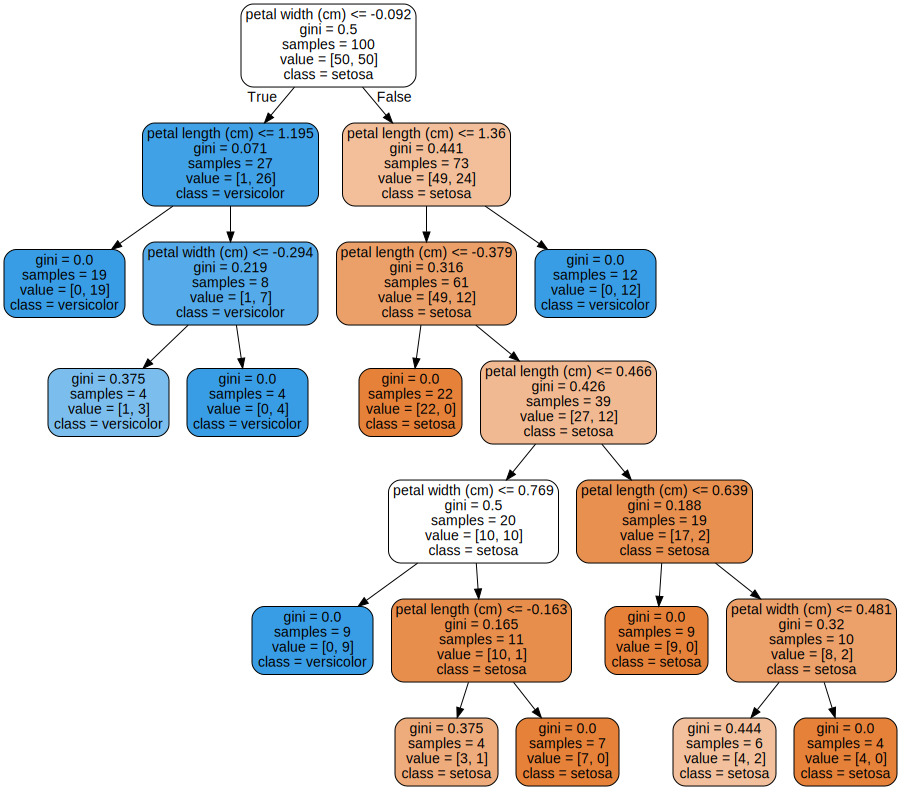

In [19]:
export_graphviz(deep_tree_clf2,
                out_file = os.path.join(Images_path, 'iris_tree.dot'),
                feature_names = iris.feature_names[2:],
                class_names = iris.target_names,
                rounded=True,
                filled = True)

Source.from_file(os.path.join(Images_path,'iris_tree.dot'))

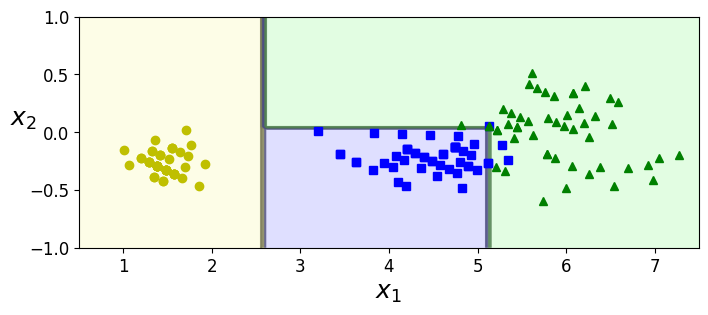

In [21]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state = 42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize = (8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes = [0.5, 7.5, -1.0, 1], iris = False)

plt.show()

Saving figure sensitivity_to_rotation_plot


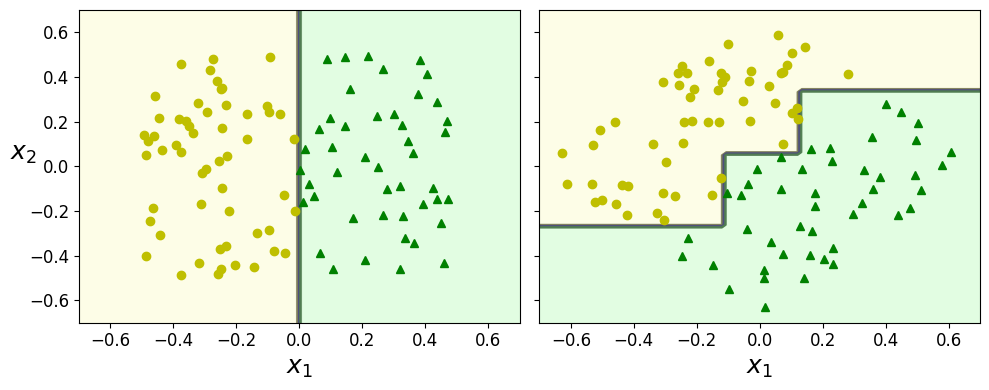

In [25]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state = 42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state = 42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols = 2, figsize = (10, 4), sharey = True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes = [-0.7, 0.7, -0.7, 0.7], iris = False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes = [-0.7, 0.7, -0.7, 0.7], iris = False)
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()
